# Capstone Project – Stellar Classification (EDA & Baseline Model)

Dataset: Kaggle Star Dataset (physical properties of stars and star type)


In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [5]:
df = pd.read_csv("stellarclass.csv")

In [6]:
df.head()


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [8]:
df.shape

(240, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [10]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [11]:
df.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df_clean = df.copy()

df_clean.head()


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [14]:
df_clean['Star type'].value_counts()

Star type
0    40
1    40
2    40
3    40
4    40
5    40
Name: count, dtype: int64

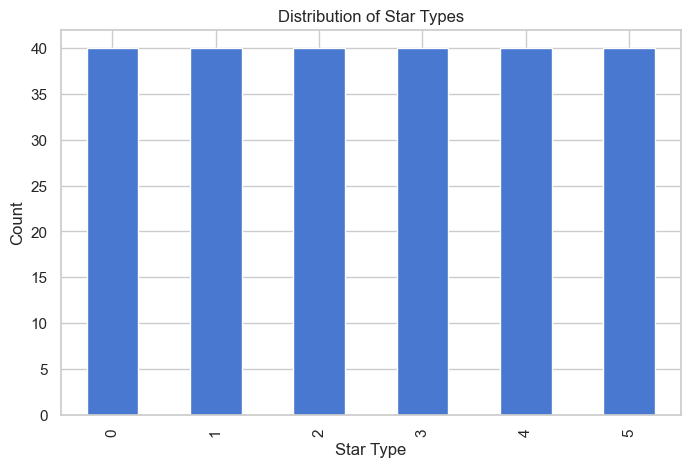

In [15]:
#Plot class distribution
df_clean['Star type'].value_counts().plot(kind='bar')
plt.xlabel('Star Type')
plt.ylabel('Count')
plt.title('Distribution of Star Types')
plt.show()


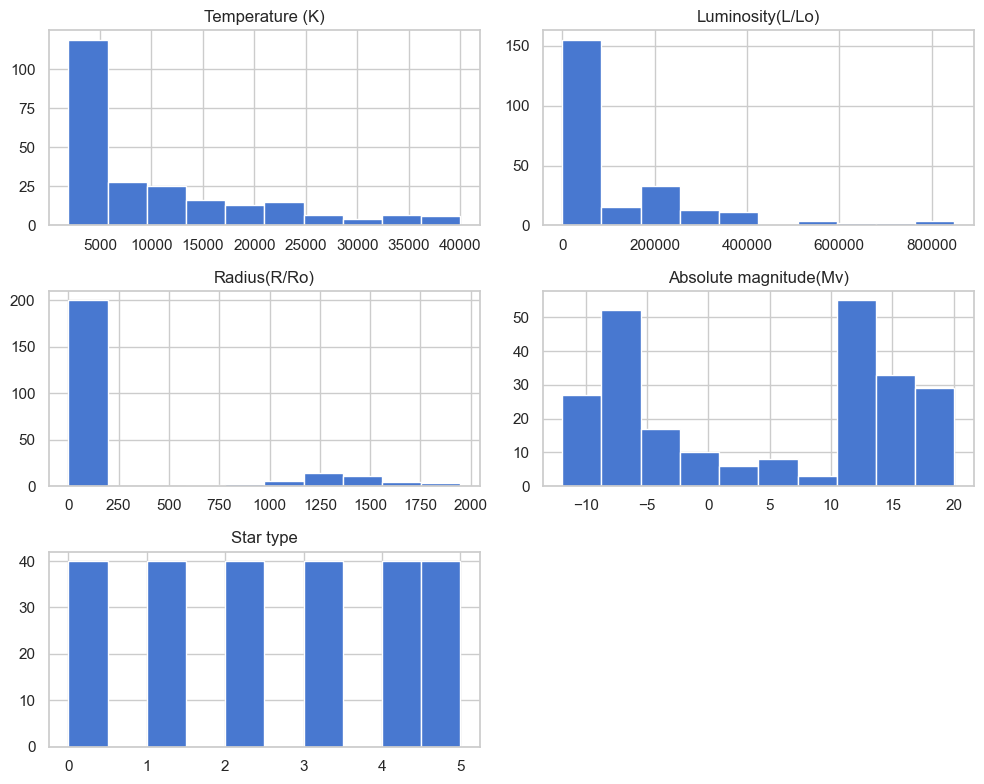

In [16]:
#Histograms for numeric features
df_clean.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


In [17]:
#Categorical value counts
print(df_clean['Star color'].value_counts())
print()
print(df_clean['Spectral Class'].value_counts())


Star color
Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
Pale yellow orange      1
White-Yellow            1
Blue                    1
Yellowish               1
Orange-Red              1
Blue white              1
Blue-White              1
Name: count, dtype: int64

Spectral Class
M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: count, dtype: int64


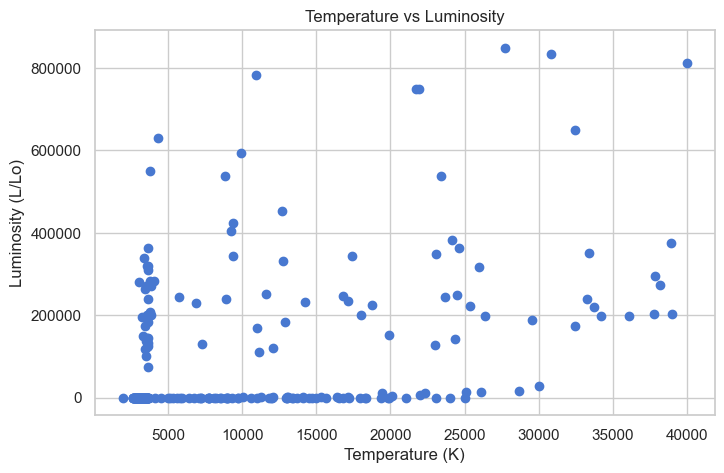

In [20]:
#Simple HR Diagram (Temperature vs Luminosity)
plt.scatter(df_clean['Temperature (K)'], df_clean['Luminosity(L/Lo)'])
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity (L/Lo)')
plt.title('Temperature vs Luminosity')
plt.show()


In [37]:
#Baseline Model

categorical_cols = ['Star color', 'Spectral Class']

df_dt = pd.get_dummies(df_clean, columns=categorical_cols)


In [38]:
X_dt = df_dt.drop('Star type', axis=1)
y_dt = df_dt['Star type']

In [39]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(
    X_dt, y_dt, test_size=0.2, random_state=42, stratify=y_dt
)


In [40]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(random_state=42)

In [42]:
dt_accuracy = dt.score(X_test_dt, y_test_dt)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 1.0


In [43]:
dt_pred = dt.predict(X_test_dt)

print("\nClassification Report:\n")
print(classification_report(y_test_dt, dt_pred))


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [44]:
#KNN

numeric_cols = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']
categorical_cols = ['Star color', 'Spectral Class']


In [45]:
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols)


In [46]:
X = df_encoded.drop('Star type', axis=1)
y = df_encoded['Star type']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [50]:
knn_accuracy = knn.score(X_test_scaled, y_test)
print("KNN Accuracy:", knn_accuracy)

KNN Accuracy: 0.8958333333333334


In [51]:
knn_pred = knn.predict(X_test_scaled)

print("\nClassification Report:\n")
print(classification_report(y_test, knn_pred))


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.80      1.00      0.89         8
           2       0.88      0.88      0.88         8
           3       0.88      0.88      0.88         8
           4       0.86      0.75      0.80         8
           5       1.00      0.88      0.93         8

    accuracy                           0.90        48
   macro avg       0.90      0.90      0.90        48
weighted avg       0.90      0.90      0.90        48

